In [1]:
import os
import tensorflow as tf
import numpy as np

In [2]:
# !pip install split-folders

In [4]:
import splitfolders
splitfolders.ratio('CatsAndDogs', output="CatsAndDogsTTS", seed=1337, ratio=(.7, 0.2,0.1))

Copying files: 1000 files [00:04, 219.98 files/s]


In [2]:
dataset_path = "C:/Users/asad/practice/CatsAndDogsTTS"
TRAINING_DATA_DIR="C:/Users/asad/practice/CatsAndDogsTTS/train"
VALID_DATA_DIR="C:/Users/asad/practice/CatsAndDogsTTS/val"
Test_Data_DIR="C:/Users/asad/practice/CatsAndDogsTTS/test"

In [3]:
IMAGE_SHAPE = (256,256) # (height, width) in no. of pixels

In [20]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                featurewise_center=False, #set input mean to 0
                                                                samplewise_center=False,  #set each sample mean to 0
                                                                featurewise_std_normalization=False, #divide input datas to std
                                                                samplewise_std_normalization=False,  #divide each datas to own std
                                                                zca_whitening=False,  #dimension reduction
                                                                rotation_range=0.5,    #rotate 5 degree
                                                                zoom_range=0.5,        #zoom in-out 5%
                                                                width_shift_range=0.5, #shift 5%
                                                                height_shift_range=0.5,
                                                                horizontal_flip=True,  #randomly flip images
                                                                vertical_flip=False,)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
class_mode='binary',
shuffle=True,
target_size=IMAGE_SHAPE)

Found 700 images belonging to 2 classes.


In [21]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                featurewise_center=False, #set input mean to 0
                                                                samplewise_center=False,  #set each sample mean to 0
                                                                featurewise_std_normalization=False, #divide input datas to std
                                                                samplewise_std_normalization=False,  #divide each datas to own std
                                                                zca_whitening=False,  #dimension reduction
                                                                rotation_range=0.5,    #rotate 5 degree
                                                                zoom_range=0.5,        #zoom in-out 5%
                                                                width_shift_range=0.5, #shift 5%
                                                                height_shift_range=0.5,
                                                                horizontal_flip=True,  #randomly flip images
                                                                vertical_flip=False)
valid_generator = valid_datagen.flow_from_directory(
VALID_DATA_DIR,
class_mode='binary',
shuffle=True,
target_size=IMAGE_SHAPE
)

Found 200 images belonging to 2 classes.


In [22]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                featurewise_center=False, #set input mean to 0
                                                                samplewise_center=False,  #set each sample mean to 0
                                                                featurewise_std_normalization=False, #divide input datas to std
                                                                samplewise_std_normalization=False,  #divide each datas to own std
                                                                zca_whitening=False,  #dimension reduction
                                                                rotation_range=0.5,    #rotate 5 degree
                                                                zoom_range=0.5,        #zoom in-out 5%
                                                                width_shift_range=0.5, #shift 5%
                                                                height_shift_range=0.5,
                                                                horizontal_flip=True,  #randomly flip images
                                                                vertical_flip=False)
test_generator = test_datagen.flow_from_directory(
Test_Data_DIR,
class_mode='binary',
shuffle=True,
target_size=IMAGE_SHAPE
)

Found 101 images belonging to 2 classes.


In [23]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [29]:
model = tf.keras.models.Sequential([
    #1st convo block
    tf.keras.layers.Conv2D(64, (3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
#2nd convo bock
    tf.keras.layers.Conv2D(128, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
   # tf.keras.layers.Dropout(0.2),
    #3rd convo block
    tf.keras.layers.Conv2D(256, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(256, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(256, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),
#4th conco block
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
    tf.keras.layers.Dropout(0.2),
    #5th convo block
    
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
    

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(64),
    #tf.keras.layers.Dropout(0.2),
    #For Binary Classes (i.e. Cats&Dogs)
    tf.keras.layers.Dense(1, activation='sigmoid')
    #For Multi-Class (i.e. Cats&Dogs&Birds....)
    # tf.keras.layers.Dense(3, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_28 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 128, 128, 128)     147584    
                                                      

In [31]:
train_generator.batch_size=4

In [27]:
# steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
# val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

In [32]:
from tensorflow.keras.optimizers import Adam

optimizer = "Adam"
model.compile(
 optimizer=optimizer,
 loss="binary_crossentropy",
 #For MultiClass use categorical_crossentropy
 #For Binary Class use binary_crossentropy

 metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=8)

history = model.fit(train_generator, validation_data=valid_generator, epochs=20, callbacks=callback).history

Epoch 1/20
175/175 [==============================] - 104s 564ms/step - loss: 47.9529 - accuracy: 0.4986 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/20
175/175 [==============================] - 85s 487ms/step - loss: 0.6956 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
175/175 [==============================] - 86s 490ms/step - loss: 0.6944 - accuracy: 0.4886 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
175/175 [==============================] - 86s 493ms/step - loss: 0.6940 - accuracy: 0.4814 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
175/175 [==============================] - 85s 487ms/step - loss: 0.6935 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
175/175 [==============================] - 85s 486ms/step - loss: 0.6948 - accuracy: 0.5043 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
175/175 [==============================] - 87s 495ms/step - loss: 0.6946 - accuracy: 0.4843 - val_loss: 0.6932 - val_

In [17]:
accuracy = history['accuracy']
val_accuracy  = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

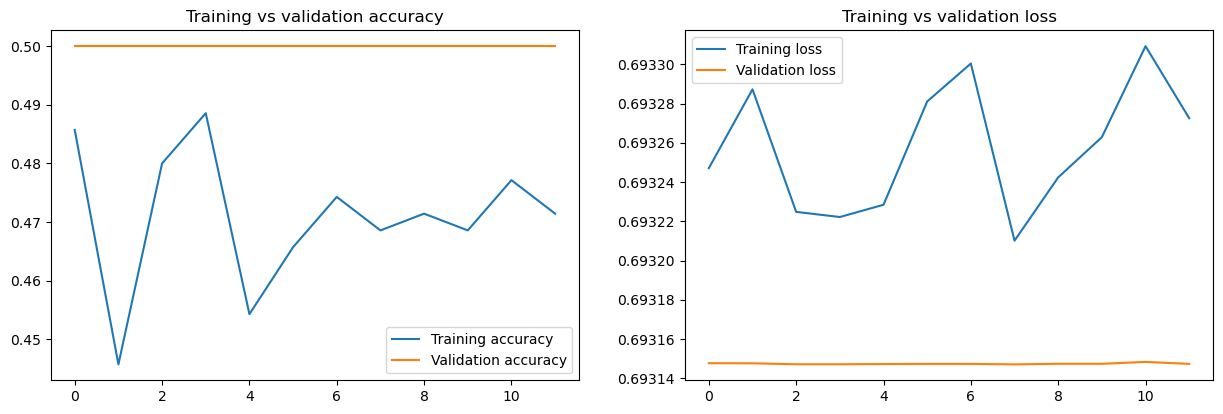

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [19]:
# make a prediction for a new image.
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(512,512))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 512, 512, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('C:/Users/asad/practice/CatsAndDogsTTS/test/Cat/1.jpg')
	# load model
	#model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result)


# entry point, run the example
run_example()

ValueError: in user code:

    File "C:\Users\asad\AppData\Local\anaconda3\envs\practice_notebook\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\asad\AppData\Local\anaconda3\envs\practice_notebook\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\asad\AppData\Local\anaconda3\envs\practice_notebook\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\asad\AppData\Local\anaconda3\envs\practice_notebook\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\asad\AppData\Local\anaconda3\envs\practice_notebook\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\asad\AppData\Local\anaconda3\envs\practice_notebook\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, 512, 512, 3)


In [40]:
model.save("./CatsAndDogs.h5")